# Практическое задание №2 по ОММ

## Вариант 27

### Выполнила студент 322 группы Салыкина Дария

## Постановка задачи

Используя метод переменных направлений, решите задачу:
$$
\begin{cases}
\frac{\partial u}{\partial t} = \Delta u + \sin2\pi x e^{-t}, 0<x<1, 0<y<1, t>0\\
u|_{x=0} = u|_{x=1} = 0,\\
\frac{\partial u}{\partial y}\bigg|_{y=0} = \frac{\partial u}{\partial y}\bigg|_{y=1} = 0,\\
u = \sin 2\pi x
\end{cases}$$

## Аналитическое решение

Ищем решение задачи в виде:
$$u(x,y,t) = T(t)V(x,y) $$
Тогда, решая исходную задачу методом разделения переменных, можем свести ее к двум задачам.

Первая: задача Коши
$$     \begin{cases}
        T^\prime(t) + \lambda T(t) = f_{nm}(t)\\
        T(0) = \sin 2\pi x
       \end{cases} $$

Вторая: задача Штурма-Лиувилля
$$     \begin{cases}
\Delta V + \lambda V = 0,\\
V|_{x=0} = V|_{x=1} = 0,\\
\frac{\partial V}{\partial y}\bigg|_{y=0} = \frac{\partial V}{\partial y}\bigg|_{y=1} = 0
\end{cases} $$
Ее тоже можно разбить на две новые задачи по переменным y и x:
$$ V(x,y)=X(x)Y(y) $$

$$     \begin{cases}
X^{\prime\prime}(x) + \alpha X(x) = 0\\
X(0) = 0\\
X(1) = 0
\end{cases} $$

Собственные значения $$\alpha = (\pi n)^2 $$
Собственные функции $$ X_n(x) = \sin(\pi nx) $$
$$\parallel  X_n \parallel ^2 = \frac{1}{2}$$

$$     \begin{cases}
Y^{\prime\prime}(y) + \beta Y(y) = 0\\
Y^\prime(0) = 0\\
Y^\prime(1) = 0
\end{cases} $$

Собственные значения $$\beta = (\pi n)^2 $$
Собственные функции $$ Y_n(x) = \cos(\pi my) $$
$$\parallel  Y_m \parallel ^2 = \frac{1}{2}(1+\delta_{n0})$$

Соберем $V$:
$$V_{nm} = \sin(\pi nx)\cos(\pi my) $$
$$\lambda = (\pi n)^2 + (\pi m)^2 $$
$$\parallel  V_{nm} \parallel ^2 = \frac{1}{4}(1+\delta_{n0}) $$
Из граничных условий видно, что $m=0, n=2$. Для остальных будем получать нулевое решение. Значит:
$$V_{20} = \sin(2\pi x) $$
$$\lambda = 4\pi^2  $$

Приведем явный вид функции $f_{nm}$:
$$ f_{nm} = \frac{1}{\parallel  V_{nm} \parallel ^2} \iint F(x,y,t)V_{nm}(x,y)dxdy = e^{-t} $$

В нашей задаче $\varphi = \sin 2\pi x$. Найдем значение для $\phi$:
$$\phi = \frac{1}{\parallel  V_{nm} \parallel ^2} \iint \varphi (x,y)V_{nm}(x,y)dxdy = 1 $$

Решим задачу Коши с помощью импульсной функции:

$$ K_{nm}(t-\tau) = e^{-\lambda_{nm}(t-\tau)} \rightarrow K_{20}(t-\tau)= e^{-4\pi^2(t-\tau)}$$

$$T_{nm} = \int_0^t K_{nm}(t-\tau) f_{nm}(t)d\tau + \phi e^{-\lambda_{nm}(t)} $$

$$T_{20} = \int_0^t e^{-4\pi^2(t-\tau)}e^{-\tau}d\tau + e^{-4\pi^2t} = \frac{e^{-t} + e^{-4\pi^2 t}(4\pi^2 -2)}{4\pi^2 - 1} $$

Тогда полное решение имеет вид:

$$ U = \frac{e^{-t} + e^{-4\pi^2 t}(4\pi^2 -2)}{4\pi^2 - 1}\sin2\pi x$$

# Построение аналитического решения

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm
from math import*
from mpl_toolkits.mplot3d import Axes3D

In [139]:
N, M, T = 200, 200, 200
x_start, x_end = 0, 1
y_start, y_end = 0, 1
t_start, t_end = 0, 1
tau= t_end/ (T-1)
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,M) 
t = np.linspace(t_start,t_end,T)
tt_a = np.linspace(t_start,t_end,2*T+1)

In [140]:
u_a = np.zeros((N,M,T))
for n in tqdm.tqdm_notebook (range(0,N)):              
    for m in range(0,M):
        for j in range(0,T):
            u_a[n,m,j]=(exp(-t[j])+(4*np.pi**2 - 2)*exp(-4*t[j]*np.pi**2))*sin(2*np.pi*x[n])/(4*np.pi**2 - 1)     

C:\Users\ty\Documents\ВУЗ\6 семестр\ОММ\Прога\WPy64-3770\python-3.7.7.amd64\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Text(0.5, 0.92, 'График аналитического решения в момент времени t =0.3')

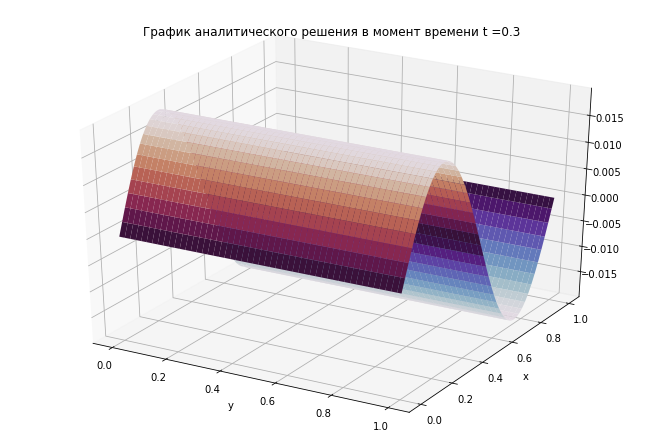

In [148]:
fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
x1,y1 = np.meshgrid(x,y)
ax.plot_surface(x1, y1, u_a[:,:,60], rstride=4, cstride=4, cmap = 'twilight' )
plt.xlabel('y')
plt.ylabel('x')
plt.title('График аналитического решения в момент времени t =' +str(round(tau*60,2)) + '')

# Численное решение

Введем равномерную трёхмерную сетку:
$$x_{i_1} =i_1h_x, i_1=\overline{0,N_x-1}, N_xh_x = 1\\
y_{i_2} = - \frac{h_y}{2} + i_2h_y, i_2=\overline{0,N_y-1}, N_yh_y = 1\\
t_j = j\tau, j=\overline{0,M-1}, M\tau = T$$

Будем искать решение методом переменных направлений, используя промежуточный слой в момент времени $t_{j+0.5}=\tau(j+0.5) $

Переход будем осуществлять следующим образом: $j \rightarrow j+0.5, j+0.5 \rightarrow j+1 $

 Конечно-разностные аналоги дифференциальных операторов $\frac{\partial^2}{\partial x^2}$ и $\frac{\partial^2}{\partial y^2}$:
 $$\Lambda_1u = \frac{u_{i_1-1,i_2} - 2u_{i_1,i_2} + u_{i_1 +1, i_2}} {h_x^2}\\
 \Lambda_2u = \frac{u_{i_1,i_2-1} - 2u_{i_1,i_2} + u_{i_1, i_2+1}} {h_y^2}$$

Решение разностной задачи обозначим за $\omega$. Мы сделали переход от дифференциальной задачи к разностной:
$$L\omega \rightarrow \Lambda_1\omega + \Lambda_2\omega $$

Получаем систему:
$$\begin{cases}
\frac{\omega^{j+0.5}_{i_1,i_2} - \omega^j_{i_1,i_2}}{0.5\tau} = \Lambda_1\omega^{j+0.5}_{i_1,i_2} + \Lambda_2\omega^{j}_{i_1,i_2}+f^{j+0.5}\\
\frac{\omega^{j+1}_{i_1,i_2} - \omega^{j+0.5}_{i_1,i_2}}{0.5\tau} = \Lambda_1\omega^{j+0.5}_{i_1,i_2} + \Lambda_2\omega^{j+1}_{i-1,i_2}+f^{j+0.5}
\end{cases}$$

Первое уравнение является неявным по направлению x и явным по y, второе - явное по x и неявное по y. Схема переменных направлений является экономической разностной схемой. Она является безусловно устойчивой, как неявная, и требует число операций, пропорциональное числу узлов сетки $O(N_x, N_y, M)$. Схема имеет точность аппроксимации $O(h_x^2 + h_y^2 + \tau^2)$

Разностная задача имеет вид (после подстановки явного вида операоров и некоторых преобразований):
$$\begin{cases}
0.5\gamma_1\omega^{j+0.5}_{i_1-1, i_2} - (1+\gamma_1)\omega^{j+0.5}_{i_1,i_2} + 0.5\gamma_1\omega^{j+0.5}_{i_1+1,i_2} = -F^{j+0.5}_{i_1,i_2}\\
0.5\gamma_2\omega^{j+1}_{i_1, i_2-1} - (1+\gamma_2)\omega^{j+1}_{i_1,i_2} + 0.5\gamma_2\omega^{j+1}_{i_1,i_2+1} = -F^{j+0.5}_{i_1,i_2}\\
\end{cases}$$


In [130]:
Nx = 200
Ny = 200
M = 200
T = 1
x = np.linspace(0,1,Nx)
y = np.linspace(0, 1, Ny)
t = np.linspace(0,T,M)
h_x = x[1] - x[0]
h_y = y[1] - y[0]
tau = T/(M-1) #t[1] - t[0]
gamma_x = 2*tau / h_x**2
gamma_y = 2*tau / h_y**2
u = np.zeros((Nx, Ny, 2 * M + 1))

In [131]:
def F_1(i1, i2, j):
    return 0.5 * gamma_y * (u[i1,i2-1,j-1] + u[i1, i2+1,j-1]) + (1 - gamma_y) * u[i1,i2,j-1] + 0.5 * tau * np.exp(-tau * (j+1)/2) * np.sin(2*np.pi*x[i1]) #делить на 2?
def F_2(i1, i2, j):
    return 0.5 * gamma_x * (u[i1-1,i2,j-1] + u[i1+1, i2,j-1]) + (1 - gamma_x) * u[i1,i2,j-1] + 0.5 * tau * np.exp(-tau * (j-1)/2) * np.sin(2*np.pi*x[i1]) #делить на 2?
def progonka_x(i2,j):
    d = np.zeros(Nx)
    sigma = np.zeros(Nx)
    d[1] = 0
    sigma[1]=0
    A = 0.5 * gamma_x
    B = 1 + gamma_x
    C = 0.5 * gamma_x
    
   # u[0,i2,j]=0 
    for m in range(1, Nx-1):
        Fm = - F_1(m,i2,j)
        d[m+1] = C / (B - A * d[m])
        sigma[m+1] = (Fm - A*sigma[m])/(A * d[m] - B)   
        u[Nx-1,i2,j] =0
        
   # u[Nx-1, i2, j] = 0  
    for m in range(Nx-1,0,-1):
        u[m-1,i2,j] = d[m] * u[m,i2,j] + sigma[m]
        
def progonka_y(i1, j):
    d = np.zeros(Ny)
    sigma = np.zeros(Ny)
    d[1] = 1
    sigma[1] = 0
    A = 0.5 * gamma_y
    B = 1 + gamma_y
    C = 0.5 * gamma_y
    for m in range(1, Ny-1):
        Fm = -F_2(i1,m-1,j)
        d[m+1] = C / (B - A * d[m])
        sigma[m+1] = (Fm - A*sigma[m])/(A * d[m] - B)
    u[i1,Ny-1,j] = sigma[-1] / (1 - d[-1])
    for m in range(Ny-1,0,-1):
        u[i1,m-1,j] = d[m] * u[i1,m,j] + sigma[m]

In [132]:
for n in range(0,Nx):
    for m in range(0,Ny):
        u[n,m,0] = np.sin(2*np.pi*x[n])

In [133]:
for j in tqdm.tqdm_notebook (range(1,2*M + 1,2)):
    for i2 in range(1, Ny-1):
        progonka_x(i2,j)
    for i1 in range(1,Nx-1):
        progonka_y(i1,j+1)
    for i2 in range(0,Ny):
        u[0,i2,j+1] = 0
        u[Nx-1,i2,j+1] = 0

C:\Users\ty\Documents\ВУЗ\6 семестр\ОММ\Прога\WPy64-3770\python-3.7.7.amd64\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Значение функции u')

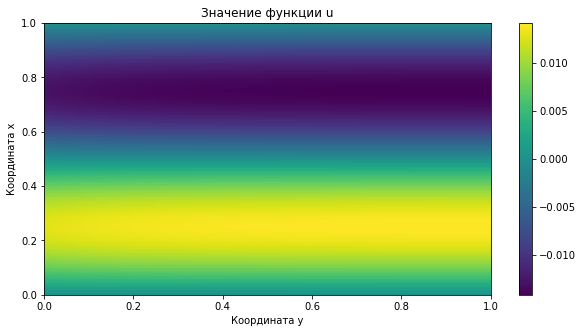

In [134]:
fig = plt.figure(figsize = (10,5))
plt.pcolormesh(y,x,u[:,:,30]) 
plt.colorbar()
plt.ylabel('Координата х')
plt.xlabel('Координата y')
plt.title('Значение функции u')

Text(0.5, 0.92, 'Численное решение в зависимости от координат в момент времени t =0.25')

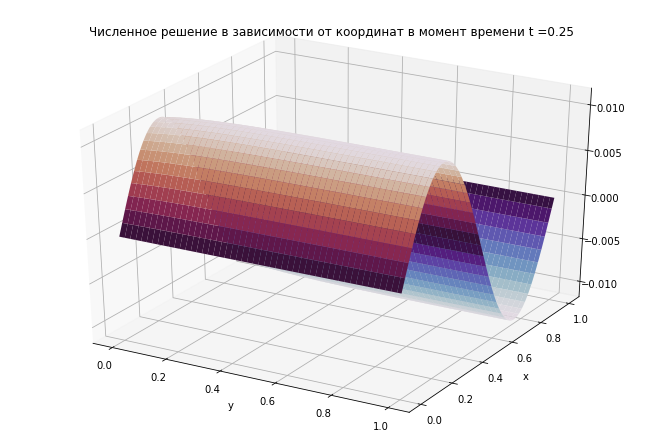

In [156]:
#3D график
fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
x1, y1 = np.meshgrid(x,y)
ax.plot_surface(x1,y1,u[:,:,50],cmap='twilight')
plt.ylabel('x')
plt.xlabel('y')
plt.title('Численное решение в зависимости от координат в момент времени t =' +str(round(tau*50,2)) + '')

Text(0.5, 0.92, 'Численное решение в зависимости от x и t')

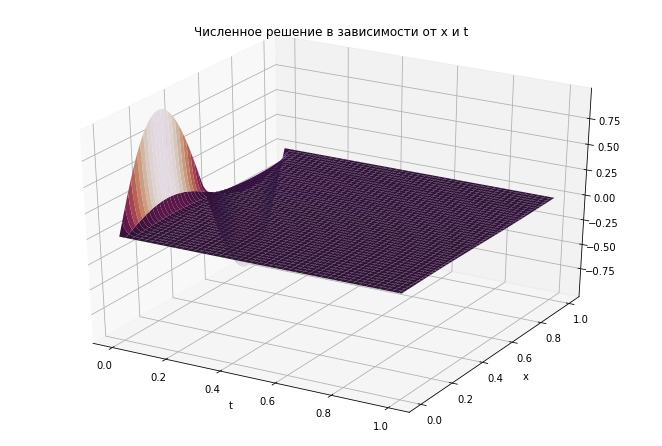

In [136]:
#3D график
tt = np.linspace(0,T,2*M+1)
fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
tt1, x1 = np.meshgrid(tt,x)
ax.plot_surface(tt1,x1,u[:,30,:],cmap='twilight')
plt.ylabel('x')
plt.xlabel('t')
plt.title('Численное решение в зависимости от x и t')

# Погрешность

Text(0.5, 0.92, 'График погрешности при t =0.25')

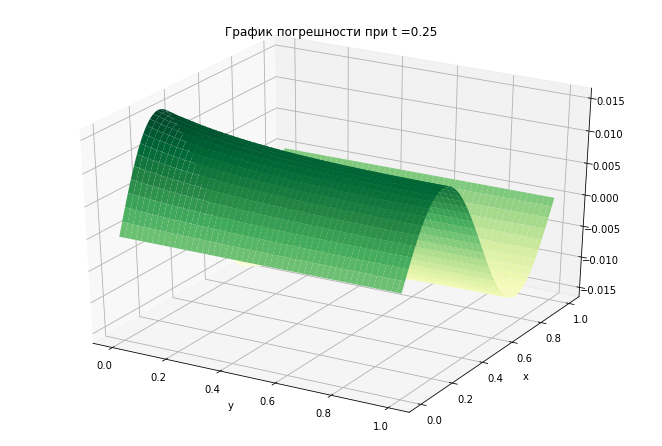

In [160]:
fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
x1,y1 = np.meshgrid(x,y)
ax.plot_surface(x1, y1, u_a[:,:,20]-u[:,:,20], rstride=4, cstride=4, cmap = 'YlGn')
plt.xlabel('y')
plt.ylabel('x')
plt.title('График погрешности при t =' +str(round(50*tau,2)) + '')